In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True)
import re

In [ ]:
df.shape

(24000, 2)

In [ ]:
df = pd.read_csv('/content/OnionOrNot.csv')
df.head()

,text,label
0,Entire Facebook Staff Laughs As Man Tightens P...,1
1,Muslim Woman Denied Soda Can for Fear She Coul...,0
2,Bold Move: Hulu Has Announced That They’re Gon...,1
3,Despondent Jeff Bezos Realizes He’ll Have To W...,1
4,"For men looking for great single women, online...",1


In [ ]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
#applying lambda function to find no.of words in each row of text
df['WordCount'] = df['text'].apply(lambda x: len(str(x).split(" ")))
df.head()

,text,label,WordCount
0,Entire Facebook Staff Laughs As Man Tightens P...,1,9
1,Muslim Woman Denied Soda Can for Fear She Coul...,0,14
2,Bold Move: Hulu Has Announced That They’re Gon...,1,23
3,Despondent Jeff Bezos Realizes He’ll Have To W...,1,19
4,"For men looking for great single women, online...",1,23


In [ ]:
df['CharCount'] = df['text'].str.len()
df.head()

,text,label,WordCount,CharCount
0,Entire Facebook Staff Laughs As Man Tightens P...,1,9,61
1,Muslim Woman Denied Soda Can for Fear She Coul...,0,14,66
2,Bold Move: Hulu Has Announced That They’re Gon...,1,23,134
3,Despondent Jeff Bezos Realizes He’ll Have To W...,1,19,101
4,"For men looking for great single women, online...",1,23,147


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Applying lambda function to find no.of stopwords in each row
df['Stopwords'] = df['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df.head()

,text,label,WordCount,CharCount,Stopwords
0,Entire Facebook Staff Laughs As Man Tightens P...,1,9,61,0
1,Muslim Woman Denied Soda Can for Fear She Coul...,0,14,66,3
2,Bold Move: Hulu Has Announced That They’re Gon...,1,23,134,0
3,Despondent Jeff Bezos Realizes He’ll Have To W...,1,19,101,0
4,"For men looking for great single women, online...",1,23,147,5


In [ ]:
df['text'] = df['text'].map(lambda x: re.sub(r'[^a-zA-Z\s]', '',x,re.I|re.A))
df.head()

,text,label,WordCount,CharCount,Stopwords
0,Entire Facebook Staff Laughs As Man Tightens P...,1,9,61,0
1,Muslim Woman Denied Soda Can for Fear She Coul...,0,14,66,3
2,Bold Move Hulu Has Announced That Theyre Gonna...,1,23,134,0
3,Despondent Jeff Bezos Realizes Hell Have To Wo...,1,19,101,0
4,For men looking for great single women online ...,1,23,147,5


In [ ]:
df['text'] = df['text'].str.lower()
df['text'] = df['text'].str.strip()
df.head()

,text,label,WordCount,CharCount,Stopwords
0,entire facebook staff laughs as man tightens p...,1,9,61,0
1,muslim woman denied soda can for fear she coul...,0,14,66,3
2,bold move hulu has announced that theyre gonna...,1,23,134,0
3,despondent jeff bezos realizes hell have to wo...,1,19,101,0
4,for men looking for great single women online ...,1,23,147,5


In [ ]:
df['text'] = df['text'].str.replace('[^\w\s]','')
df.head()

<ipython-input-14-d4a0e8fe7c8b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s]','')


,text,label,WordCount,CharCount,Stopwords
0,entire facebook staff laughs as man tightens p...,1,9,61,0
1,muslim woman denied soda can for fear she coul...,0,14,66,3
2,bold move hulu has announced that theyre gonna...,1,23,134,0
3,despondent jeff bezos realizes hell have to wo...,1,19,101,0
4,for men looking for great single women online ...,1,23,147,5


In [ ]:
#removing stop words
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head()

,text,label,WordCount,CharCount,Stopwords
0,entire facebook staff laughs man tightens priv...,1,9,61,0
1,muslim woman denied soda fear could use weapon,0,14,66,3
2,bold move hulu announced theyre gonna go ahead...,1,23,134,0
3,despondent jeff bezos realizes hell work secon...,1,19,101,0
4,men looking great single women online dating o...,1,23,147,5


In [ ]:
#Lemmatisation
import en_core_web_sm

sp = en_core_web_sm.load()#loading a string to small english pipeline

def lemma(input_str):
    s = sp(input_str)
    
    input_list = []
    for word in s:
        w = word.lemma_#assigning lemma of a word in string to w
        input_list.append(w)
        
    output = ' '.join(input_list)
    return output

df['text'] = df['text'].apply(lambda x: lemma(x))


df.head()

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


,text,label,WordCount,CharCount,Stopwords
0,entire facebook staff laugh man tighten privac...,1,9,61,0
1,muslim woman deny soda fear could use weapon,0,14,66,3
2,bold move hulu announce they re go to go ahead...,1,23,134,0
3,despondent jeff bezos realize hell work second...,1,19,101,0
4,man look great single woman online date offer ...,1,23,147,5


In [ ]:
from wordcloud import WordCloud

In [ ]:
true = df[df['label'] == 1].text
fake = df[df['label'] == 0].text

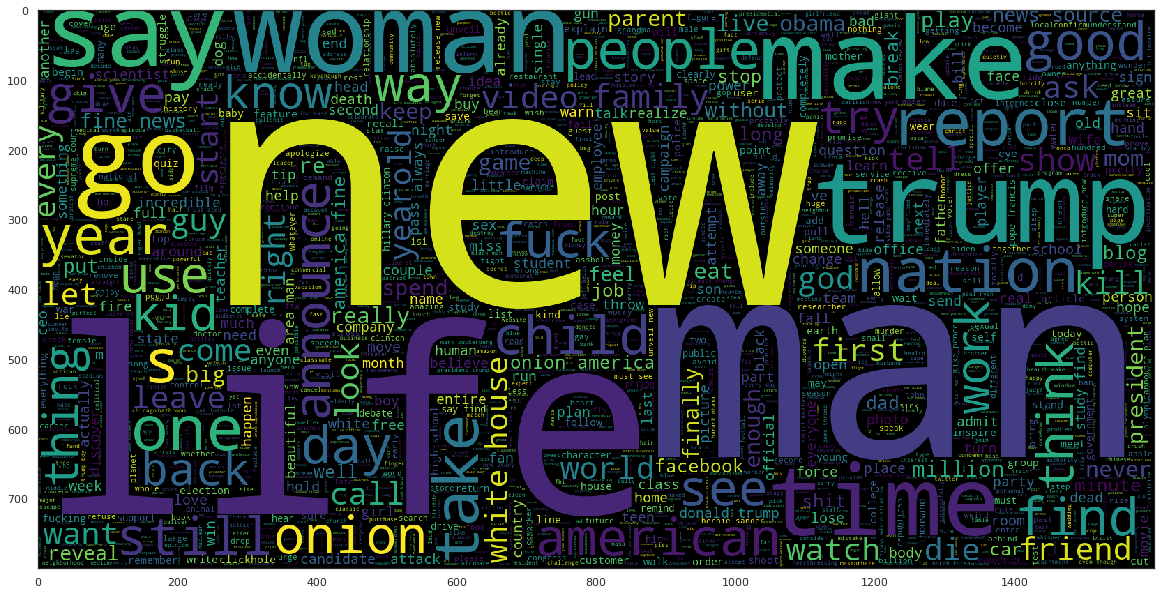

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 ).generate(" ".join(true))
plt.imshow(wc , interpolation = 'nearest')

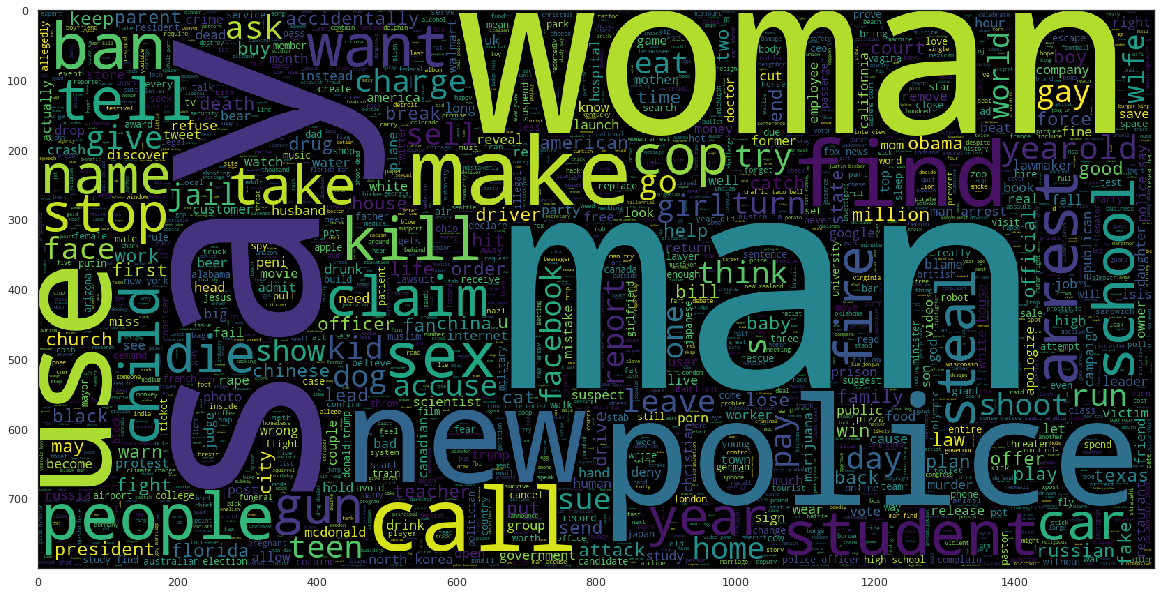

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 ).generate(" ".join(fake))
plt.imshow(wc , interpolation = 'nearest')

<Figure size 1440x1440 with 0 Axes>

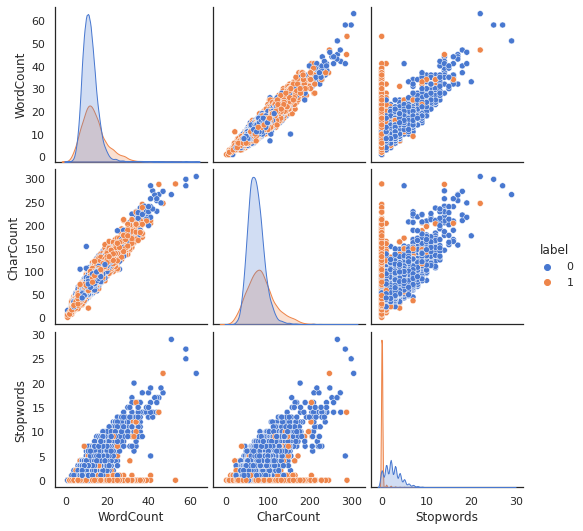

In [ ]:
plt.figure(figsize=(20,20))
sns.pairplot(df, hue="label")
plt.show()

In [ ]:
grouped = df.groupby('label').mean().reset_index()
grouped

,label,WordCount,CharCount,Stopwords
0,0,11.710000,71.694333,2.568
1,1,13.703778,83.260000,0.134


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b6fad4580>,
      dtype=object)

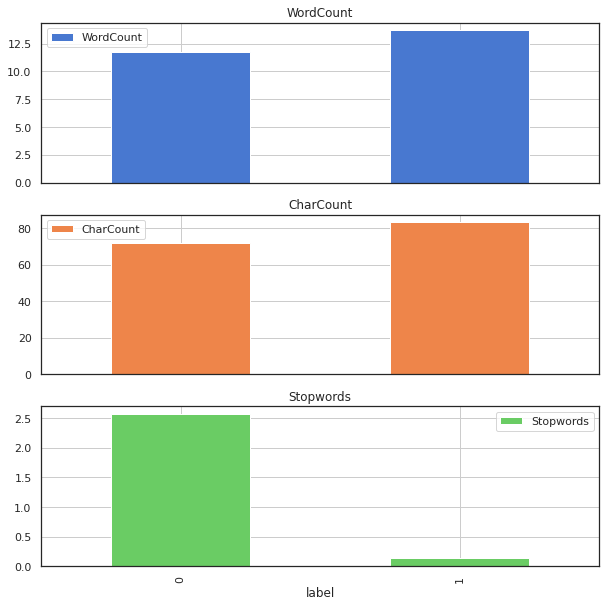

In [ ]:
df.groupby('label').mean().plot.bar(subplots=True, figsize=(10,10), grid=True)

In [ ]:
freq = pd.Series(' '.join(df['text']).split()).value_counts()[0:300]
print(freq)
freq = list(freq.index)

man         2490
say         1551
woman       1301
not         1260
new         1093
            ... 
fox          116
bear         115
internet     115
park         115
office       113
Length: 300, dtype: int64


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=len(freq), lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
df_vect = tfidf.fit_transform(df['text'])
text_df = pd.DataFrame(df_vect.toarray(), columns=tfidf.get_feature_names())
text_df.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,accidentally,accuse,actually,admit,allow,america,american,americans,announce,apologize,...,wife,win,woman,work,worker,world,write,wrong,year,yearold
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.440067,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.705175,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.552699,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.271076,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
text_df['WordCount'] = df['WordCount']
text_df['CharCount'] = df['CharCount']
text_df['Stopwords'] = df['Stopwords']
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Columns: 303 entries, accidentally to Stopwords
dtypes: float64(300), int64(3)
memory usage: 55.5 MB


In [ ]:
X = text_df
y = df['label']

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)
    
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[3440  379]
 [ 220 1961]]
Accuracy: 0.9001666666666667


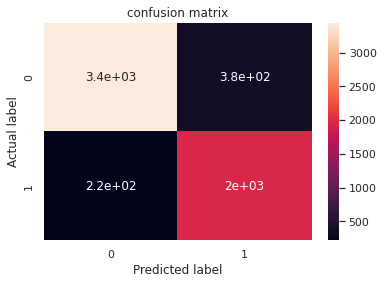

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
conf_matrix=metrics.confusion_matrix(y_test,y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix,annot=True)
plt.title('confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

[[3314  505]
 [ 134 2047]]
Accuracy: 0.8935


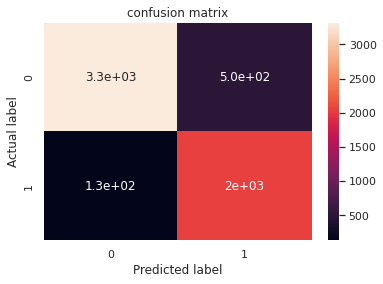

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_mnb_pred = mnb.predict(X_test)
confus_matrix=metrics.confusion_matrix(y_test,y_mnb_pred)
print(confus_matrix)
sns.heatmap(confus_matrix,annot=True)
plt.title('confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Accuracy:", metrics.accuracy_score(y_test,y_mnb_pred))